# TP Cuadrados mínimos y regresión lineal

Estudiantes:
 
            * Barneche Facundo Hernán
            * Hernández Andrés

# Introducción a Cuadrados Mínimos y la Regresión Lineal

# 1. Regresión Lineal

La regresión lineal es una técnica estadística utilizada para modelar la relación entre una variable dependiente "Y" y una o más variables independientes "X". El objetivo es encontrar una línea recta que minimice la discrepancia entre las predicciones y los valores observados.

# 2. Cuadrados Mínimos

Cuadrados Mínimos se refiere a cualquier método que minimice la suma de los cuadrados de las diferencias entre los valores observados y los valores predichos por un modelo. Este enfoque es aplicable a diversos tipos de modelos y contextos, no solo a la regresión lineal. La idea central es siempre ajustar un modelo de manera que las discrepancias (errores) entre las observaciones y las predicciones sean lo más pequeñas posible en términos de sus cuadrados.

# Análisis

La regresión lineal y el método de cuadrados mínimos son herramientas fundamentales en el análisis estadístico y la ciencia de datos. Permiten modelar y entender relaciones entre variables, haciendo predicciones y tomando decisiones basadas en datos.

Esta introducción proporciona una base sólida para comprender los principios detrás de la regresión lineal y el uso de cuadrados mínimos para estimar los parámetros del modelo.

1. Programar eficientemente el cálculo de la pendiente y de la ordenada al origen para el método de cuadrados mínimos a partir de n puntos. No hacer operaciones de más o redundantes.

In [1]:
# Importación de librerías a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Optimización de las formulas vistas en clase

m = (n ∑XiYi ​− ∑Xi ∑Yi) / (n ∑Xi² - (∑Xi)²)

b = (∑Yi − m ∑Xi) / n

In [2]:
# Generación funcion
def calculate_slope_yintercept(x, y):
    """
    Esta función obtiene una ordenada al origen y la pendiente respecto a los parámetros recibidos

    * Parámetros:
    x, y -- Lista de enteros para generar las sumatorias correspondientes

    * Devuelve:
    Retorna la ordenada al origen y pendiente calculada
    """
    n = len(x) # Cantidad de puntos
    sum_x = sum(x) # Sumatoria X
    sum_y = sum(y) # Sumatoria Y
    sum_xy = sum(x_i * y_i for x_i, y_i in zip(x, y)) # Sumatoria XY
    sum_x2 = sum(x_i**2 for x_i in x) # Sumatoria X²
    
    #   (n   ∑XiYi ​−   ∑Xi    ∑Yi)   / (n    ∑Xi²  - (∑Xi)²)
    m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)
    b = (sum_y - m * sum_x) / n
    
    return m, b

2) Usar los datos del archivo Excel que aparece en la unidad, aplicar lo anterior y calcular, y por último graficar los puntos y la recta obtenida.

In [3]:
excel = pd.read_excel('excel.xlsx', sheet_name='Hoja1') # Obtenemos los datos del excel

x_excel = excel['día'] # Obtenemos la columna de los dias
y_excel = excel['acumulados'] # Obtenemos la columna de acumulados

m, b = calculate_slope_yintercept(x_excel, y_excel) # Obtenemos la pendiente y ordenada al origen

# Impresión calculos
print(f"Pendiente (m): {m}")
print(f"Ordenada al origen (b): {b}")

Pendiente (m): 1406.5942618467504
Ordenada al origen (b): -62138.47083685545


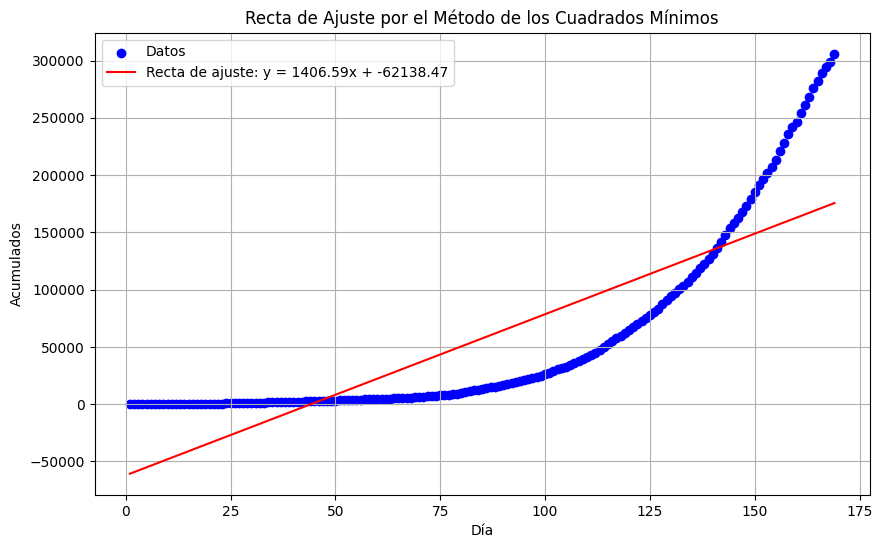

In [4]:
# Graficamos los datos y la recta de ajuste
plt.figure(figsize=(10, 6))
plt.scatter(x_excel, y_excel, color='blue', label='Datos')
plt.plot(x_excel, m * x_excel + b, color='red', label=f'Recta de ajuste: y = {m:.2f}x + {b:.2f}')
plt.xlabel('Día')
plt.ylabel('Acumulados')
plt.title('Recta de Ajuste por el Método de los Cuadrados Mínimos')
plt.legend()
plt.grid(True)
plt.show()

3) Sobre los mismos datos, ajustar una curva de la forma y = b*e^(ax), convirtiéndola previamente en lineal y aplicando luego regresión lineal. Comparar de alguna forma la curva obtenida con la anterior.

Ajustamos una curva de la forma y = b*e^(ax):

1. Convertimos la ecuación exponencial en una lineal tomando el logaritmo natural de ambos lados:
    * ln⁡(y) = ln⁡(b*e^(ax))
    * ln⁡(y) = ln(b) + ax

2. Redefinimos las variables para usar regresión lineal:
    Y′= ln⁡(y)
    A = ln⁡(b)

La ecuación lineal resultante es: Y′= ax+A

3. Aplicamos la regresión lineal a los datos transformados x y ln⁡(y) para obtener a y A. Luego, b se puede encontrar como b=e^A.

4. Comparamos la curva obtenida y = b*e^(ax) con la recta de ajuste obtenida anteriormente.

In [5]:
y_log = np.log(y_excel) # Convertir y a ln(y)

# Calculamos pendiente y ordenada al origen para la regresión lineal en los datos originales
m_linear, b_linear = calculate_slope_yintercept(x_excel, y_excel)

# Calculamos pendiente y ordenada al origen para los datos transformados (ln(y))
a, ln_b = calculate_slope_yintercept(x_excel, y_log)

b_exp = np.exp(ln_b) # Convertir ln(b) a b

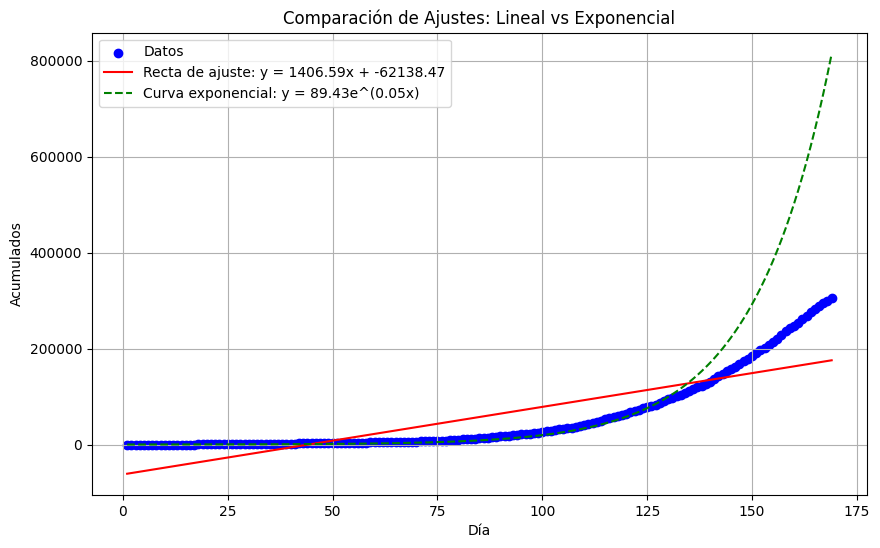

In [6]:
# Graficamos los datos, la recta de ajuste y la curva exponencial
plt.figure(figsize=(10, 6))
plt.scatter(x_excel, y_excel, color='blue', label='Datos')
plt.plot(x_excel, m_linear * x_excel + b_linear, color='red', label=f'Recta de ajuste: y = {m_linear:.2f}x + {b_linear:.2f}')
plt.plot(x_excel, b_exp * np.exp(a * x_excel), color='green', linestyle='--', label=f'Curva exponencial: y = {b_exp:.2f}e^({a:.2f}x)')
plt.xlabel('Día')
plt.ylabel('Acumulados')
plt.title('Comparación de Ajustes: Lineal vs Exponencial')
plt.legend()
plt.grid(True)
plt.show()